# Práctica Machine Learning KC

## Problema de regresión para predecir el precio de un airbnb 

En este ejercicio se pide predecir el precio de un aribnb basado en un dataset real de datos de apartamentos en alquiler en todo el mundo. Ya que la variable objetivo, que es el precio, es un valor continuo debemos aplicar algoritmos de regresión en lugar de clasificación, que serían más útiles para datos discretos.

## 1. Carga de datos, limpieza y división train/test 

En primer lugar, se va a echar un vistazo previo a los datos abriendo el csv en excel, eliminando todos aquellos campos que no nos interesen como URLs, IDs, reseñas... ya que estos no aportan valor alguno

In [46]:
# Importamos las librerias necesarias
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [47]:
house_data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';', encoding = "latin")
print(house_data.shape)
house_data.head(5).T  

(14780, 75)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Last Scraped,07/03/2017,08/04/2017,08/04/2017,08/04/2017,08/04/2017
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat..."
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza CataluÃ±a Catalonia Square is the larg...,Plaza CataluÃ±a Catalonia Square is the larg...,We're right in the heart of the chic L'Eixampl...,NaN
Notes,The loft is located on a gated property. Ther...,NaN,NaN,Local permit: HUTB-006794,NaN
Transit,There is no public transportation from this lo...,Ideal to discover the city either on foot or b...,Ideal to discover the city either on foot or b...,"Whatever it is you came to see in Barcelona, I...",NaN


Vamos a dividir los conjuntos de train y test antes de la imputación y limpieza de datos. Esto se realiza antes para evitar un posible sesgo en los datos, para tener una correcta validación al tener un conjunto de datos de test intactos antes de la evaluación del rendimiento del modelo y una simulación de valores reales. 

Para la separación de los conjuntos se va a utilizar la fuinción `train_test_split` de sklearn. Adicionalmente se va a dividir un 80% en el conjunto de train y un 20% para el conjunto de test, y se va a realizar el suffle para mezclar los datos y evitar el sesgo en caso de que los datos pudieran estar ordenados.


In [48]:
train, test = train_test_split(house_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/house_data_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/house_data_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/house_data_train.csv', sep=';', decimal='.')
house_data.head(5).T

Dimensiones del dataset de training: (11824, 75)
Dimensiones del dataset de test: (2956, 75)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Last Scraped,08/04/2017,08/04/2017,08/04/2017,08/04/2017,08/04/2017
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cÃ³modo en JerÃ³nimos, una de las ...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazÃ³n de Madrid, este apartam...",NaN,NaN,NaN
Notes,Facilitamos guÃ­a de eventos y rutas turÃ­stic...,Hora llegada: a partir de las 15:00 horas Hora...,NaN,NaN,NaN
Transit,Excelente ubicaciÃ³n a tan solo 5 minutos anda...,"Acceso a todos los medios de trasporte, BUS, M...",ç¾ç¾Casaåºå --å°éMetro 5å·çº¿vsita al...,NaN,NaN


## 2. Análisis exploratorio

Vamos a proceder al análisis de los datos viendo usando funciones de Pandas para intentar sacar conclusiones a cerca de los datos.

In [49]:
house_data.describe()

,ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,94.803722,12.754420,12.754420,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,15.247078,34.578895,34.578895,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,100.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,100.000000,2.000000,2.000000,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,100.000000,6.000000,6.000000,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,100.000000,519.000000,519.000000,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


El método `describe()` nos arroja los principales valores estadísticos y nos permite sacar las siguientes conclusiones:
1. Vemos que en el conteo de atributos no todas las columnas tienen el valor 11824, por lo que va a ver atributos nulos. Más adelante se decidirá qué hacer con ellos.
2. La fila MAX nos arroja información que puede tratarse de outliers. Por ejemplo, vemos que algún apartamento recibe 1721 reviews al mes, lo cual a priori parece algo elevado, aunque puede ser real ya que suponiendo que tiene una capacidad para 16 huéspedes (el máximo) si cada día cambiara de huéspedes y todo el mes alquilara las 16 plazas, suponiendo que todos los huéspedes dejan una reseña, podría tener como máximo 16 * 30 =  480 reseñas en un mes. 

Realmente el describe nos aporta una primera visión del dataset, pero nos aporta poca información a cerca de outliers y demás.

Para saber qué atributos tienen valores nulos vamos a ejecutar las funciones `isnull().any()`:

In [50]:
pd.set_option('display.max_rows', 75)
house_data.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Last Scraped,08/04/2017,08/04/2017,08/04/2017,08/04/2017,08/04/2017
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cÃ³modo en JerÃ³nimos, una de las ...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazÃ³n de Madrid, este apartam...",NaN,NaN,NaN
Notes,Facilitamos guÃ­a de eventos y rutas turÃ­stic...,Hora llegada: a partir de las 15:00 horas Hora...,NaN,NaN,NaN
Transit,Excelente ubicaciÃ³n a tan solo 5 minutos anda...,"Acceso a todos los medios de trasporte, BUS, M...",ç¾ç¾Casaåºå --å°éMetro 5å·çº¿vsita al...,NaN,NaN


Tras echar un vistazo por encima a las filas, se van a eliminar otras variables que son categóricas y sin valor, como reseñas, descripciones, etc. 

In [51]:
columns_to_drop = [
    'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 
    'Transit', 'Access', 'Interaction', 'House Rules', 'Host Name', 'Host Since', 'Host Location', 
    'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 
    'Country', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review'
    ]

house_data.drop(columns=columns_to_drop, axis=1, inplace=True)
house_data.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Experiences Offered,none,none,none,none,none
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood,JerÃ³nimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,JerÃ³nimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,ChamberÃ­
City,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room


Algo a destacar es que todas los apartamentos que salen en el head son de Madrid, por lo que vamos a ver el número total de airbnbs por ciudad por ver si podemos eliminar algunos registros:

c:\Users\jaime\Documents\KeepCoding IA\Machine Learning\mlenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jaime\Documents\KeepCoding IA\Machine Learning\mlenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


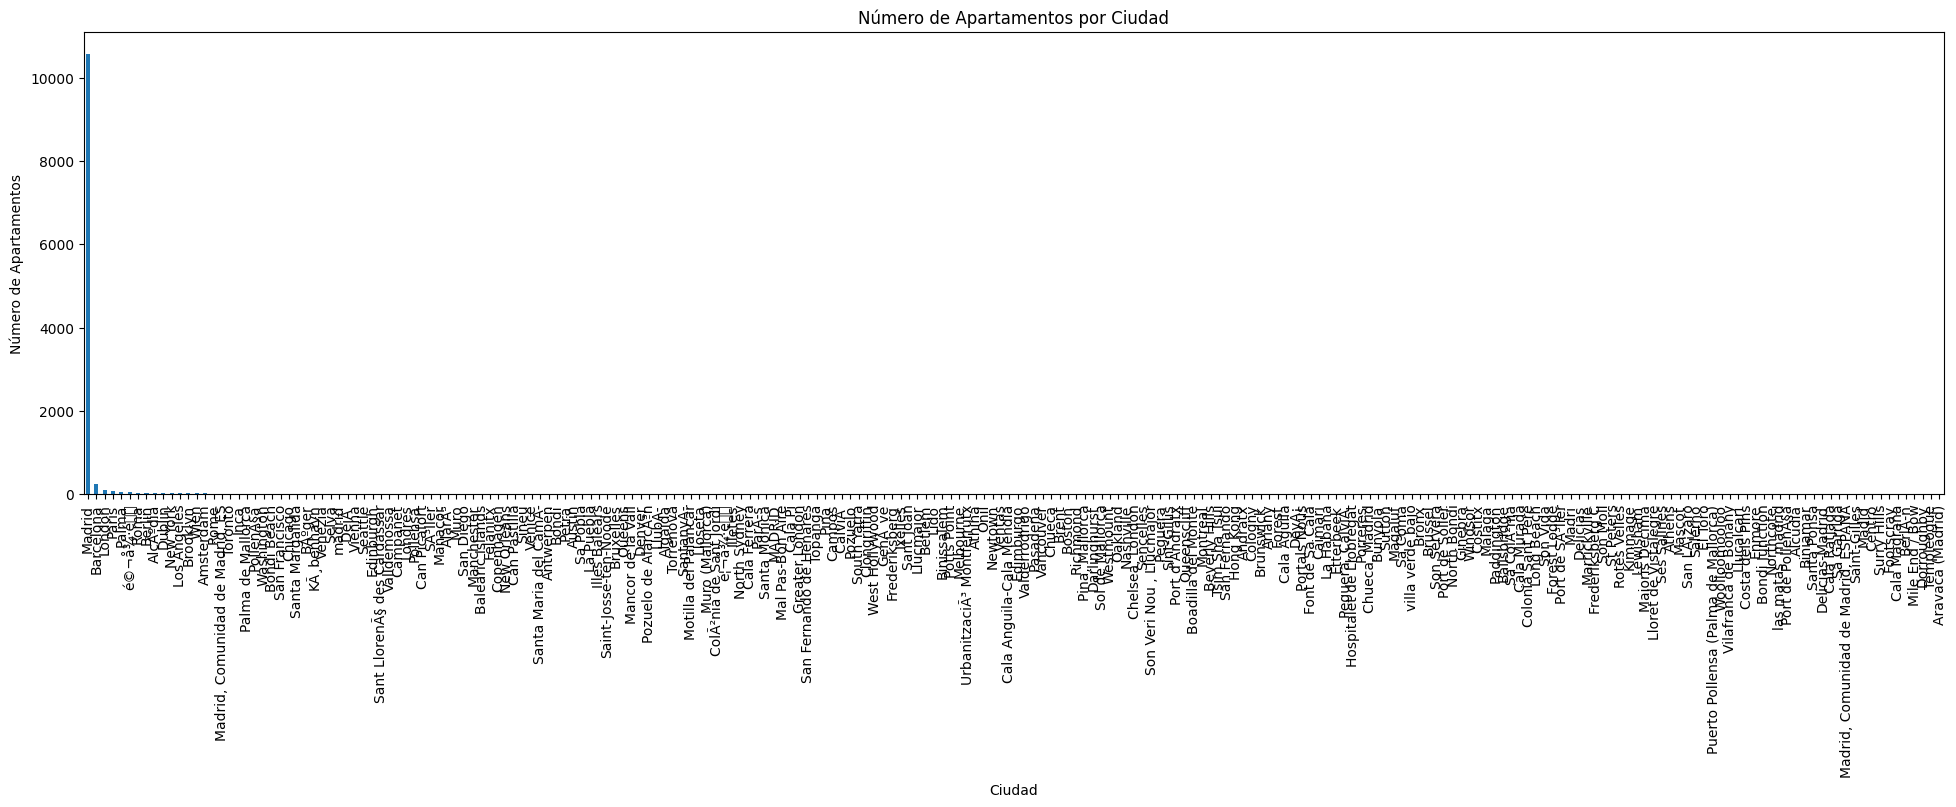

In [52]:
city_counts = house_data['City'].value_counts()

plt.figure(figsize=(24, 6))
city_counts.plot(kind='bar')
plt.title('Número de Apartamentos por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de Apartamentos')
plt.xticks(rotation=90)
plt.show()

Se puede ver que la gran mayoría de datos están en Madrid, por lo que se va a descartar el restro de registros para poder trabajar de forma más cómoda usando el barrio en el que se encuentren. Y por ello, se va a eliminar también la columna City, ya que ya no nos sirve.

In [53]:
house_data = house_data[house_data['City'] == 'Madrid']
house_data.drop(columns='City', axis=1, inplace=True)

A continuación, vamos a revisar los datos vacíos:

In [54]:
house_data.isnull().any()

ID                                False
Experiences Offered               False
Host Response Rate                 True
Host Verifications                 True
Neighbourhood                      True
Neighbourhood Cleansed            False
Neighbourhood Group Cleansed      False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                              True
Weekly Price                       True
Monthly Price                      True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False


Ya que hay bastantes variables que incluyen datos nulos, vamos a realizar un conteo de nulos por variable por ver si se puede descartar alguna variable más.

In [55]:
house_data.isnull().sum()

ID                                    0
Experiences Offered                   0
Host Response Rate                 1313
Host Verifications                    7
Neighbourhood                      3527
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed          0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            40
Bedrooms                             18
Beds                                 37
Bed Type                              0
Amenities                            90
Square Feet                       10154
Price                                 8
Weekly Price                       7870
Monthly Price                      7894
Security Deposit                   6018
Cleaning Fee                       4285
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0


Ya que el conjunto de train se compone de aproximadamente 10k registros, se va a prescindir de todas aquellas variables que tengan más de 1k nulos:

In [56]:
house_data = house_data.dropna(axis=1, thresh=len(house_data) - 1000)

In [57]:
house_data.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Experiences Offered,none,none,none,none,none
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood Cleansed,JerÃ³nimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,ChamberÃ­
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0


Ahora se va a revisar el número de valores distintos por descartar variables que no aporten valor:

In [58]:
house_data.apply(lambda x: len(x.unique()))

ID                                10567
Experiences Offered                   1
Host Verifications                  177
Neighbourhood Cleansed              125
Neighbourhood Group Cleansed         21
Property Type                        20
Room Type                             3
Accommodates                         16
Bathrooms                            16
Bedrooms                             11
Beds                                 17
Bed Type                              5
Amenities                          9031
Price                               269
Guests Included                      14
Extra People                         49
Minimum Nights                       39
Maximum Nights                      152
Availability 30                      31
Availability 60                      61
Availability 90                      91
Availability 365                    366
Number of Reviews                   244
Cancellation Policy                   5
Calculated host listings count       38


In [59]:
house_data.drop(columns="Geolocation", axis=1, inplace=True)
house_data.drop(columns="Experiences Offered", axis=1, inplace=True)
house_data.drop(columns="Neighbourhood Cleansed", axis=1, inplace=True)

A continuación, se va a codificar las variables categóricas *Host Verifications, Amenities y Features* añadiendo un conteo de cada característica que incluya. También se van a categorizar las variables *Neighbourhood Group Cleansed, Property Type, Room Type, Bed Type, Cancellation Policy* usando target encoder.

In [60]:
house_data.dtypes

ID                                  int64
Host Verifications                 object
Neighbourhood Group Cleansed       object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Price                             float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 30                     int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Cancellation Policy                object
Calculated host listings count    float64
Features                          

In [61]:
house_data['amenities_count'] = house_data['Amenities'].apply(lambda x: len(x.split(',')))
house_data['features_count'] = house_data['Features'].apply(lambda x: len(x.split(',')))
house_data['host_verifications_count'] = house_data['Host Verifications'].apply(lambda x: len(x.split(',')))

target_encoder = ce.TargetEncoder(cols=['Neighbourhood Group Cleansed'])
house_data['neighbourhood_encoded'] = target_encoder.fit_transform(house_data['Neighbourhood Group Cleansed'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Property Type'])
house_data['property_type_encoded'] = target_encoder.fit_transform(house_data['Property Type'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Room Type'])
house_data['room_type_encoded'] = target_encoder.fit_transform(house_data['Room Type'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Bed Type'])
house_data['bed_type_encoded'] = target_encoder.fit_transform(house_data['Bed Type'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Cancellation Policy'])
house_data['cancellation_policy_encoded'] = target_encoder.fit_transform(house_data['Cancellation Policy'], house_data['Price'])

AttributeError: 'float' object has no attribute 'split'

En función del atributo, vamos a completar los valores nulos con la media o con 0 para valores numéricos y con Unknown en caso de atributos de tipo texto.

### Media
* Bathrooms
* Bedrooms
* Beds
* Price. En este caso nos interesa que sea la media ya que es nuestra variable objetivo.

### Valor 0
* Review Scores Rating
* Reviews per Month 

### Unknown 
* City 
* Amenities
* Features

In [123]:
house_data['Bathrooms'].fillna(house_data['Bathrooms'].mean(), inplace=True)
house_data['Bedrooms'].fillna(house_data['Bedrooms'].mean(), inplace=True)
house_data['Beds'].fillna(house_data['Beds'].mean(), inplace=True)
house_data['Price'].fillna(house_data['Price'].mean(), inplace=True)

house_data['Review Scores Rating'].fillna(house_data['Review Scores Rating'].mode()[0], inplace=True)
house_data['Reviews per Month'].fillna(house_data['Reviews per Month'].mode()[0], inplace=True)

house_data['City'].fillna('Unknown', inplace=True)
house_data['Amenities'].fillna('Unknown', inplace=True)
house_data['Features'].fillna('Unknown', inplace=True)

house_data.isnull().any()

ID                      False
City                    False
Property Type           False
Room Type               False
Accommodates            False
Bathrooms               False
Bedrooms                False
Beds                    False
Bed Type                False
Amenities               False
Number of Reviews       False
Review Scores Rating    False
Reviews per Month       False
Geolocation             False
Features                False
Price                   False
dtype: bool

Es importante tener en cuenta que probablemente este no sea el conjunto final de datos de entrenamiento final, ya que puede que identifiquemos ciertas variables con poca correlación con el precio o que aportan poca información o mucho error. Por ejemplo, antes veíamos que hay algunos atributos que tienen una gran cantidad de nulos, y con la imputación podemos incluir mucho sesgo.

En primer lugar, vamos a ver la correlación entre las distintas variables numéricas:

<Axes: >

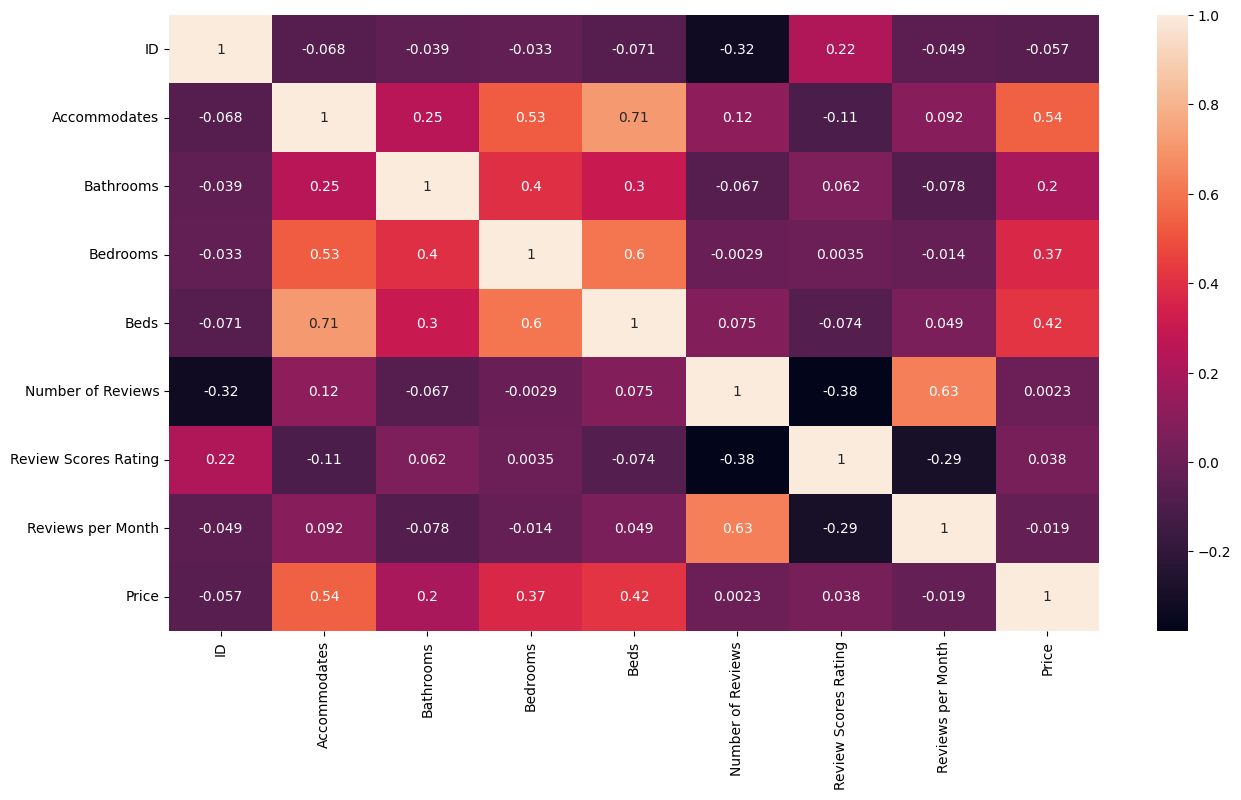

In [105]:
numeric_data = house_data.select_dtypes(include=[np.number])
corr = numeric_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Viendo la última fila observamos que las principales variables numéricas que influyen en el precio son el número de inquilinos, el número de habitaciones, el número de camas y el número de baños en ese orden, lo cual tiene bastante sentido ya que las otras tres variables hacen referencia a las reviews, y estas pueden ser buenas o malas independientemente del precio que tengan. 

Al solo comparar variables numéricas ignoramos información bastante importante como la ciudad ya que, por la ley de oferta/demanda, un apartamento en Soria seguramente no cueste lo mismo que en NYC, aunque tengan el mismo número de inquilinos, habitaciones...

Otras variables que se ven afectadas al no ser valores numéricos son *Amenities* (que se refiere a las comodidades que incluye el apartamento como TV, WIFI...) y *Features* (que se refiere a las características extra que incluye el anuncio como Foto de perfil del arrendador). Se considera que estas variables pueden tener una alta relación en el precio, por ello, se va a generar una nueva columna con el conteo de cada una de estas variables y se volverá a ver la relación con el precio para vcer si efectivamente el número de comodidades y características influye positivamente en el precio de los airbnb. 

In [106]:
house_data['Amenities_count'] = house_data['Amenities'].apply(lambda x: len(x.split(',')))
house_data['Features_count'] = house_data['Features'].apply(lambda x: len(x.split(',')))
house_data.head(5).T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0
Beds,1.0,1.0,1.0,4.0,2.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Cable TV,Internet,Wireless Internet,Air con...","Wireless Internet,Air conditioning,Elevator in...","Wireless Internet,Air conditioning,Elevator in...","TV,Internet,Wireless Internet,Air conditioning...","TV,Wireless Internet,Air conditioning,Kitchen,..."


Volvemos a sacar el mapa de correlación:

<Axes: >

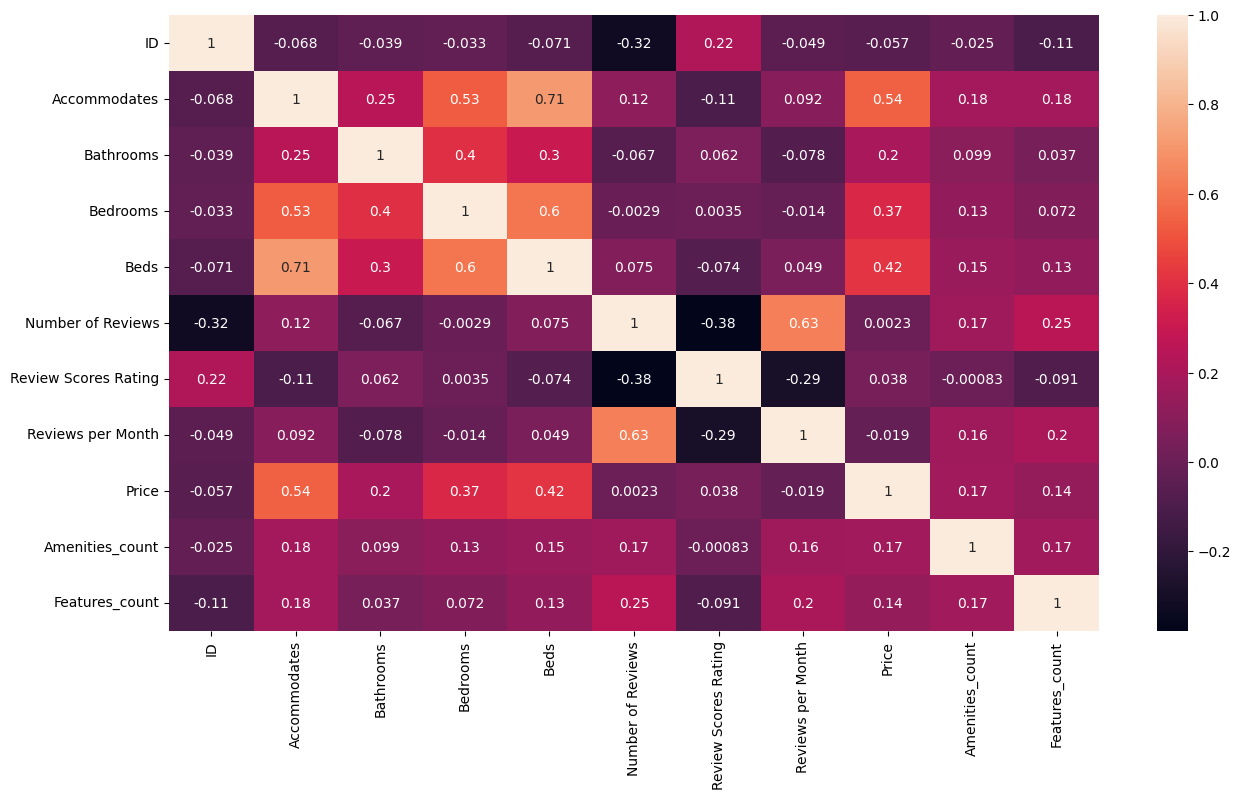

In [107]:
numeric_data = house_data.select_dtypes(include=[np.number])
corr = numeric_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Viendo el resultado, vemos que tampoco parece influir demasiado en el precio, al no haber mucha correlación. Es cierto que estas variables pueden verse afectadas por la imputación realizada anteriormente, ya que hemos rellenado los valores vacíos con la palabra Unknown y eso contaría como 1 solo Amenity. 

En cualquier caso, mantendremos estas variables y que sea el modelo quien decida qué variables son realmente importantes. 

A continuación vamos a codificar las variables categóricas Room Type y Property Type usando target encoder:

In [124]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['Room Type'])
house_data['room_type_encoded'] = target_encoder.fit_transform(house_data['Room Type'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Property Type'])
house_data['property_type_encoded'] = target_encoder.fit_transform(house_data['Property Type'], house_data['Price'])

Ahora vamos a sacar el scatter matrix para ver de un vistazo rápido la relación entre las distintas variables:

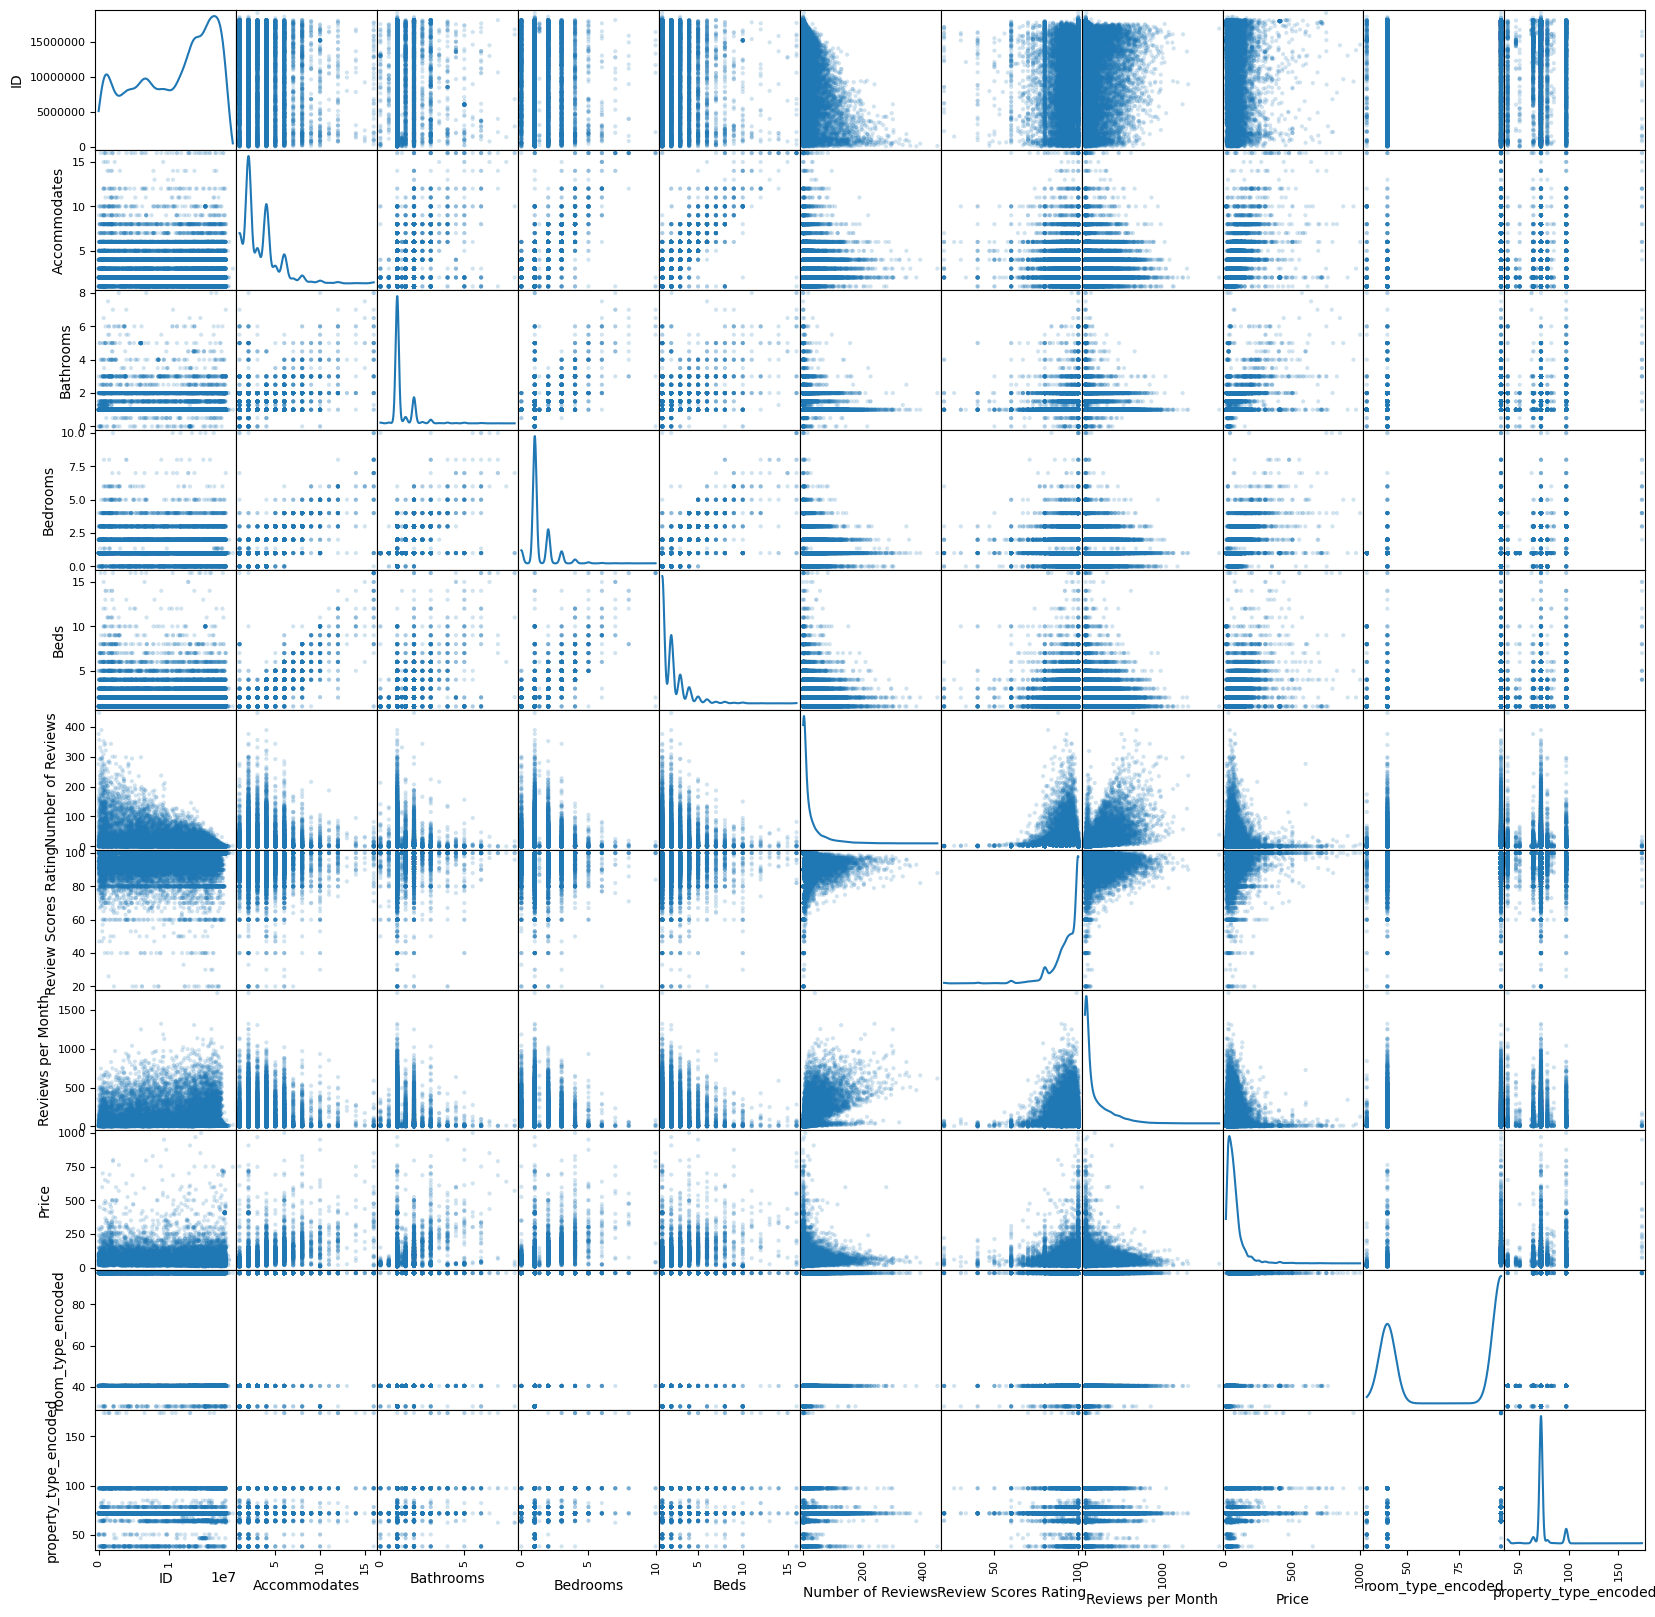

In [125]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()